# TASK :3 - CAR PRICE PREDICTION
Author:Ankita chetan cha

Problem Statement

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

## Import Libraries

In [47]:
# Import Libraries
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
     

Defaulting to user installation because normal site-packages is not writeable


In [48]:
df=pd.read_csv('CarPrice.csv')

In [49]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [50]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [51]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [52]:
df.duplicated().sum()

0

In [53]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [54]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [55]:
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [56]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

<Figure size 1000x800 with 0 Axes>

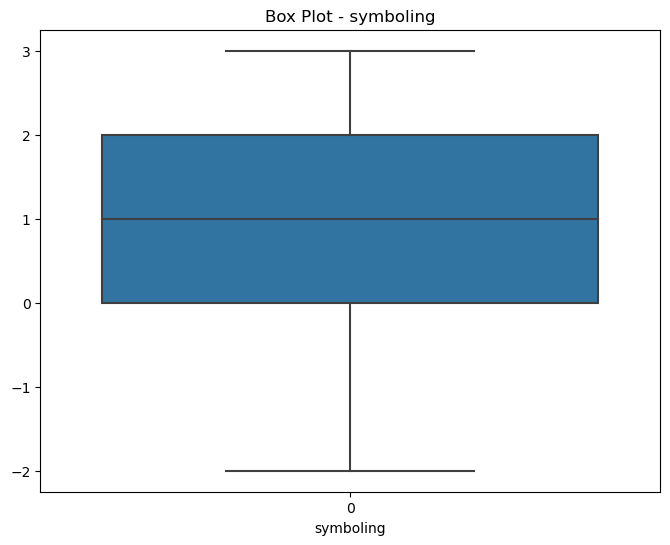

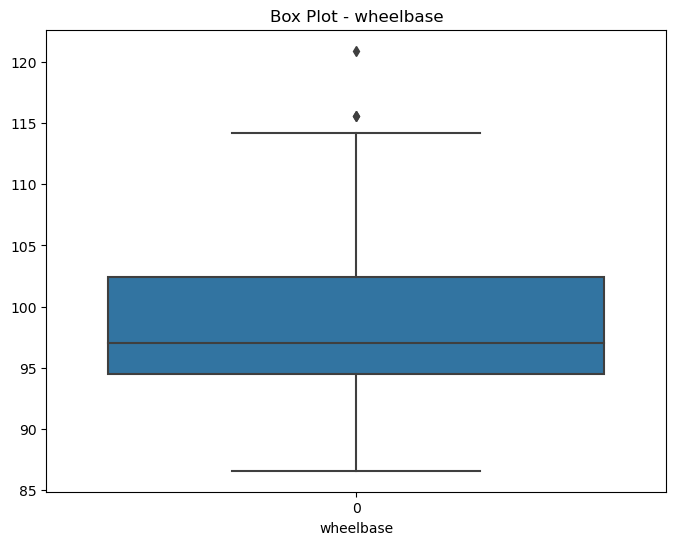

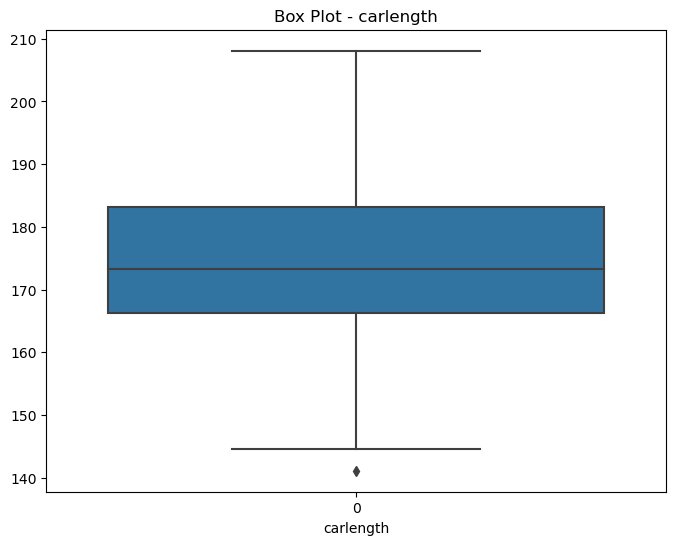

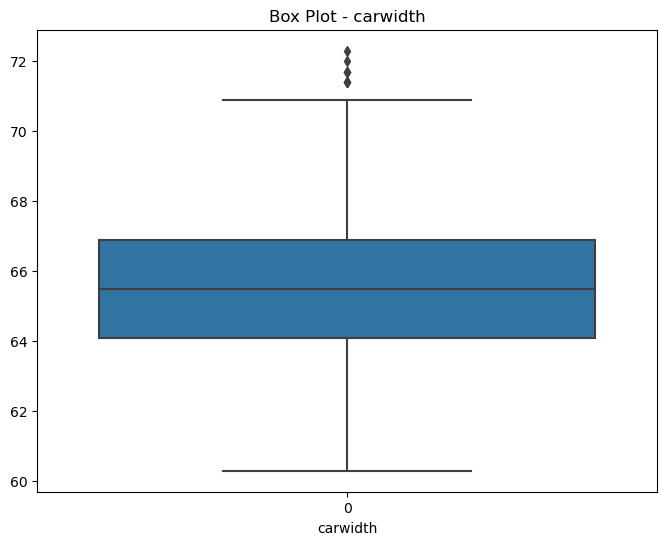

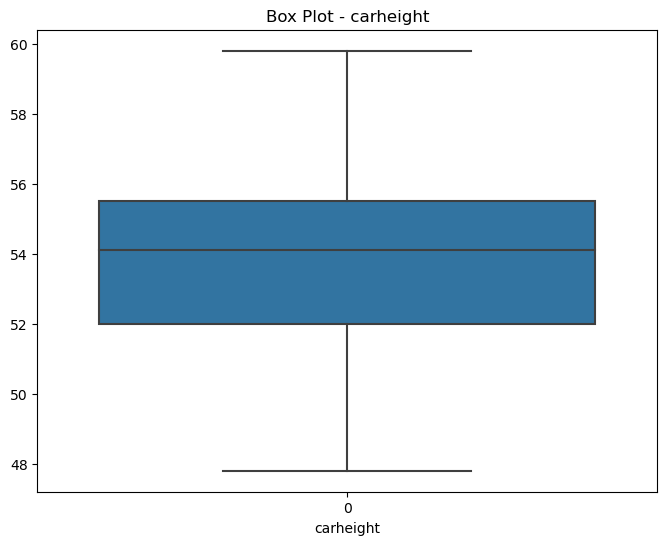

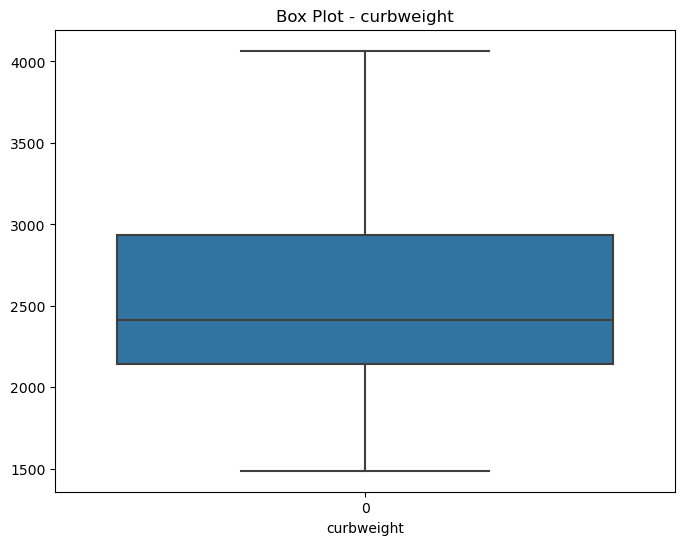

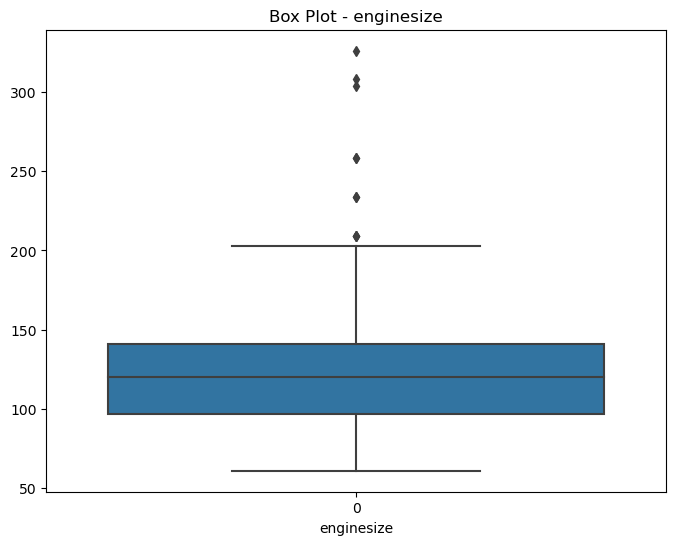

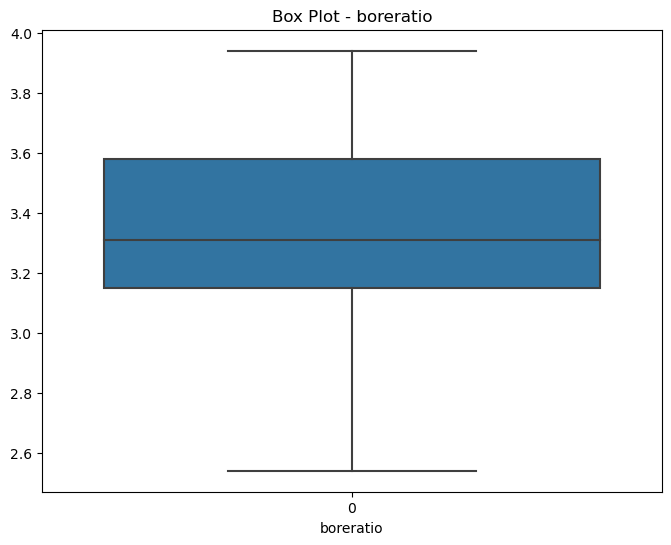

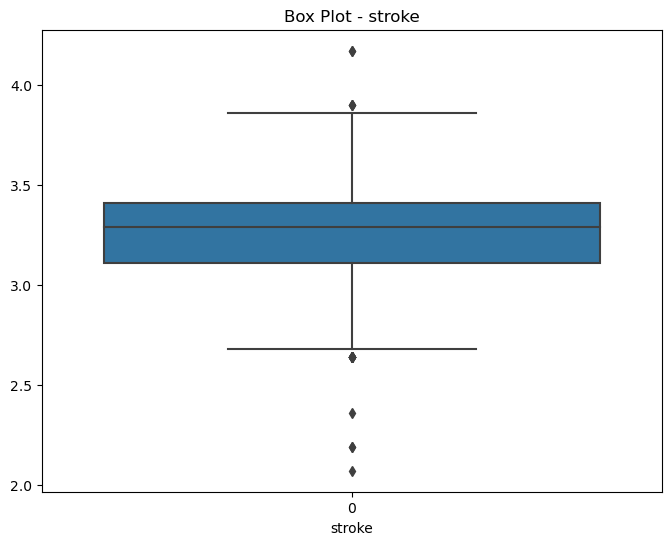

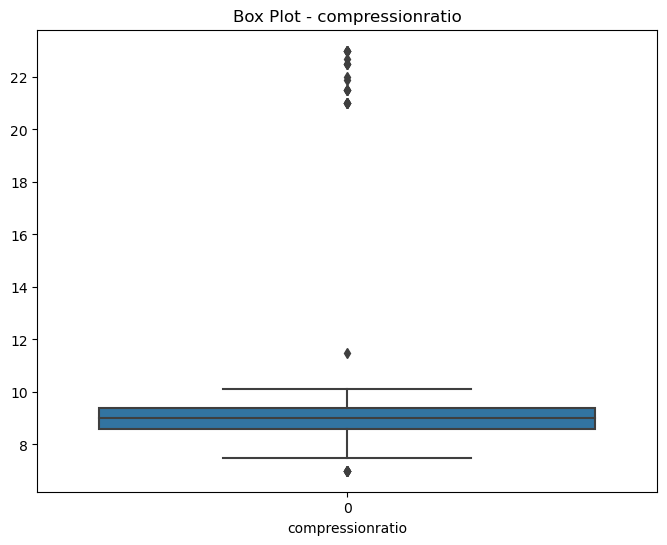

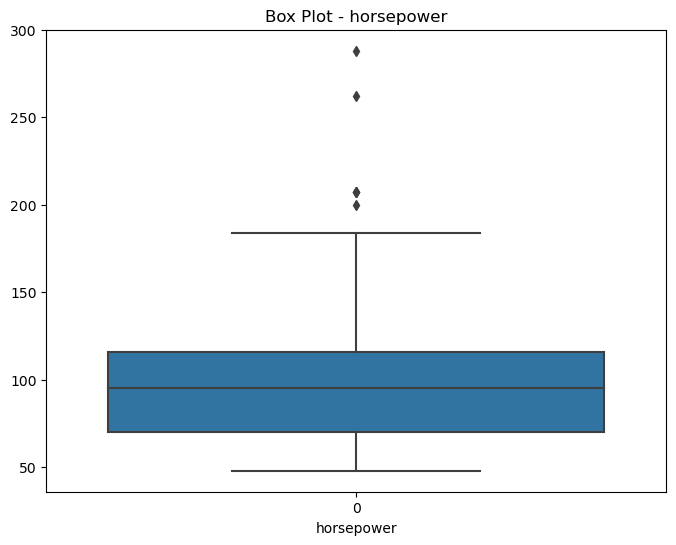

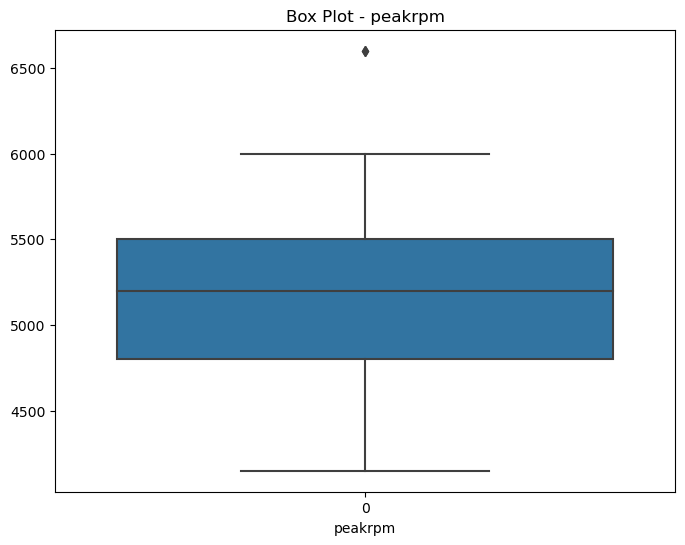

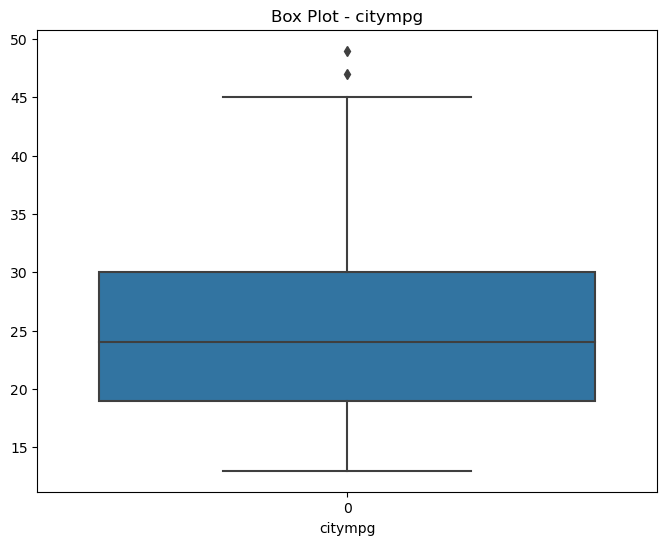

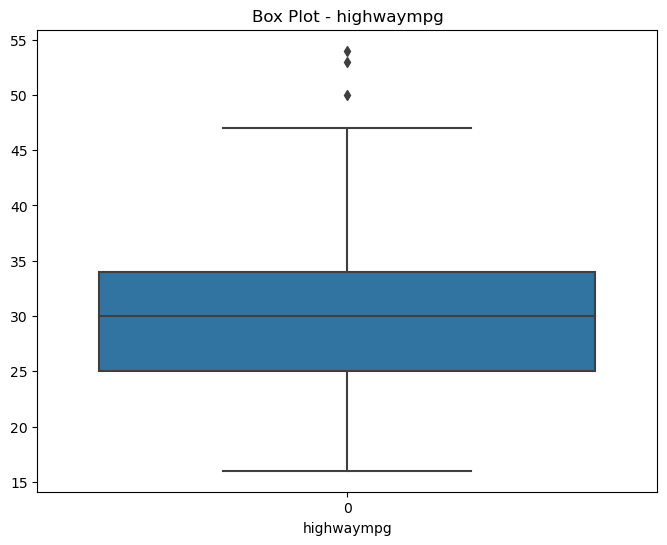

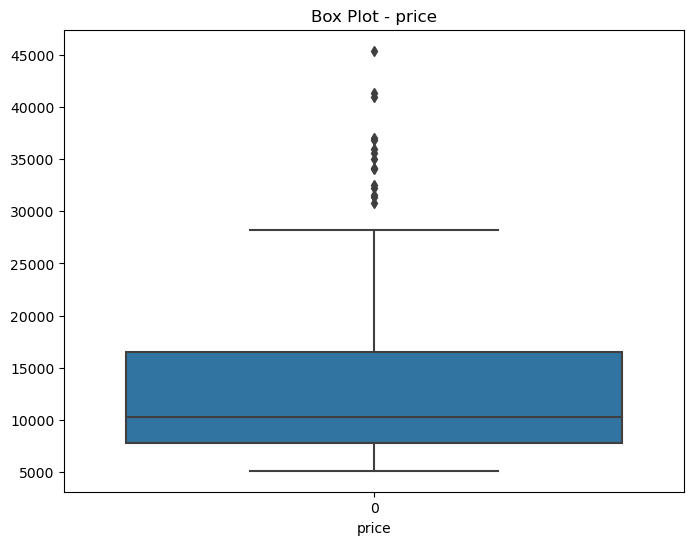

In [57]:
# Create a list of variables to check for outliers
variables = ['symboling', 'wheelbase',
             'carlength', 'carwidth', 'carheight', 'curbweight',
              'enginesize',  'boreratio', 'stroke',
             'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
             'price']
# Create a box plot for each variable
plt.figure(figsize=(10, 8))
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[variable])
    plt.title(f'Box Plot - {variable}')
    plt.xlabel(variable)
    plt.show()
     

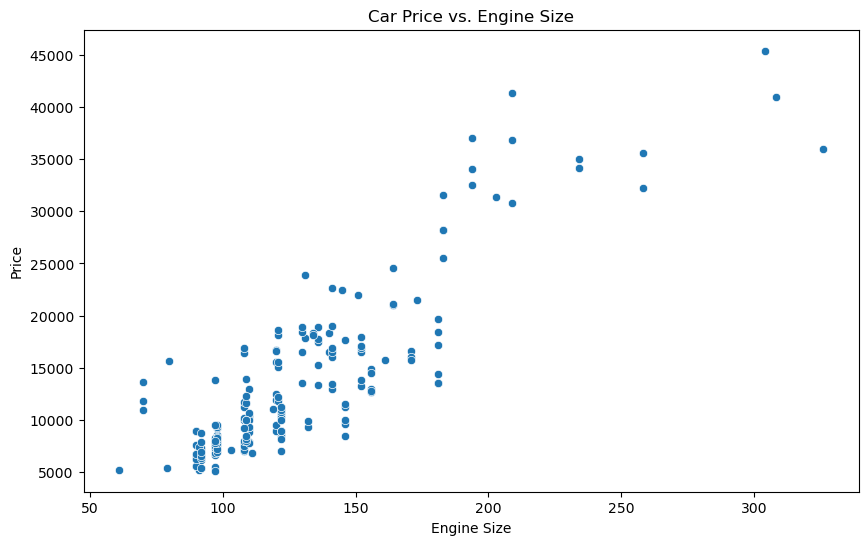

In [58]:
# Chart - 2 visualization code
# Visualize the relationship between car prices and engine size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='enginesize', y='price')
plt.title('Car Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()
     

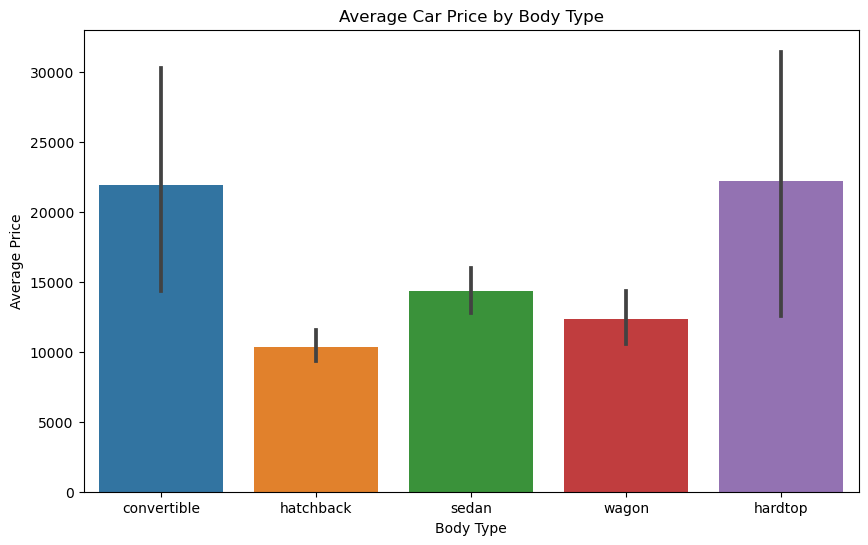

In [59]:

# Chart - 3 visualization code
# Visualize the average car price by car body type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='carbody', y='price')
plt.title('Average Car Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.show()
     

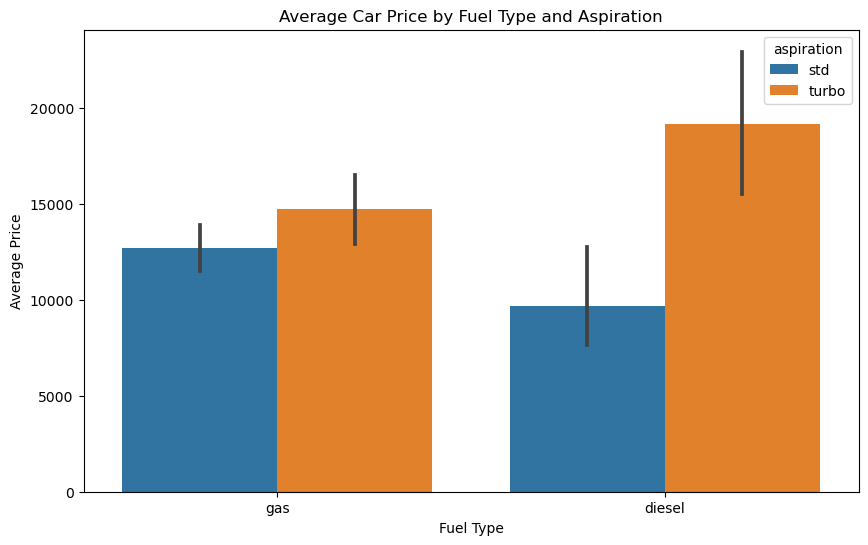

In [60]:

# Chart - 4 visualization code
# Compare the average car prices based on the fuel type and aspiration.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='fueltype', y='price', hue='aspiration')
plt.title('Average Car Price by Fuel Type and Aspiration')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

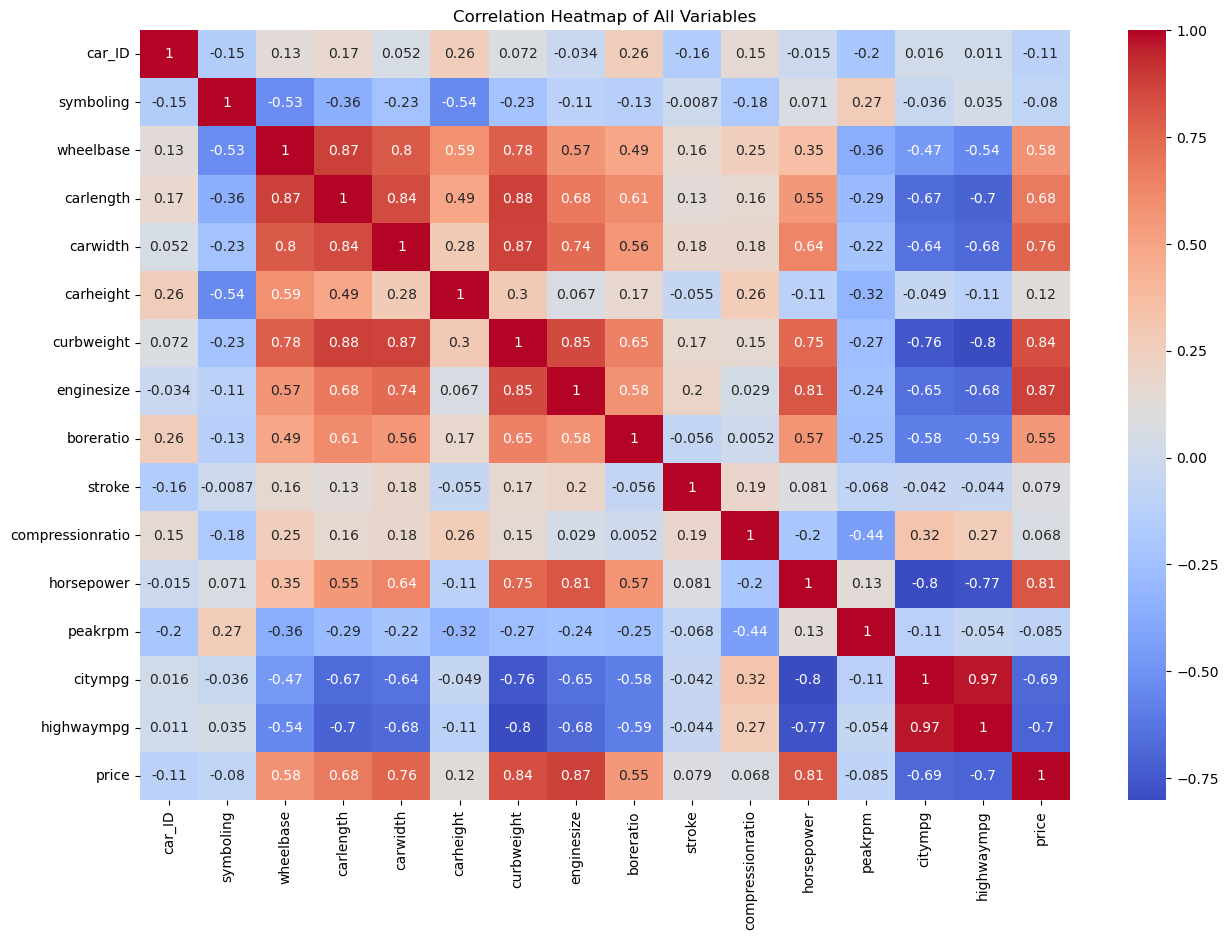

In [61]:
# Explore the correlation between numeric variables related to car prices.
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()  # Compute the correlation matrix for all variables
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of All Variables')
plt.show()

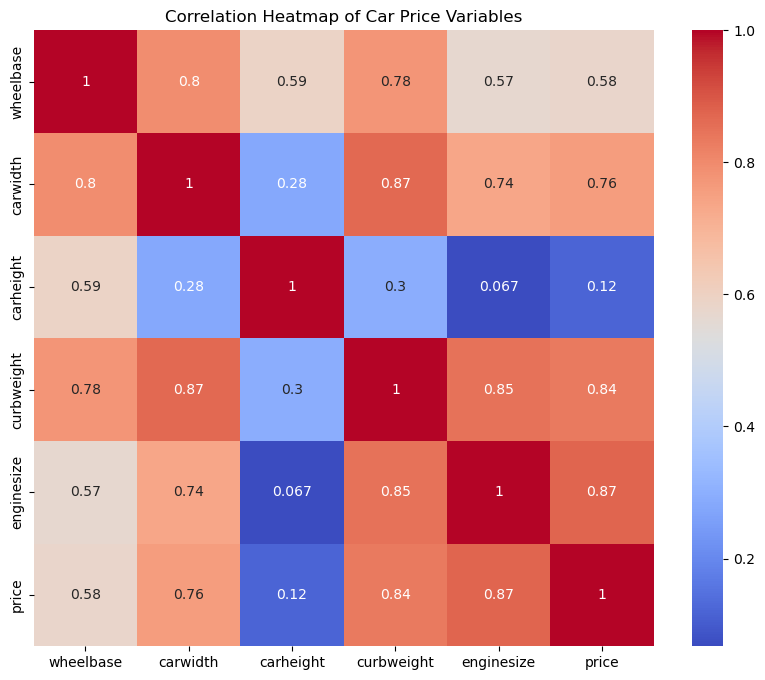

In [62]:

# Chart - 5 visualization code
# Explore the correlation between numeric variables related to car prices.
plt.figure(figsize=(10, 8))
corr_matrix = df[['wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Car Price Variables')
plt.show()
     

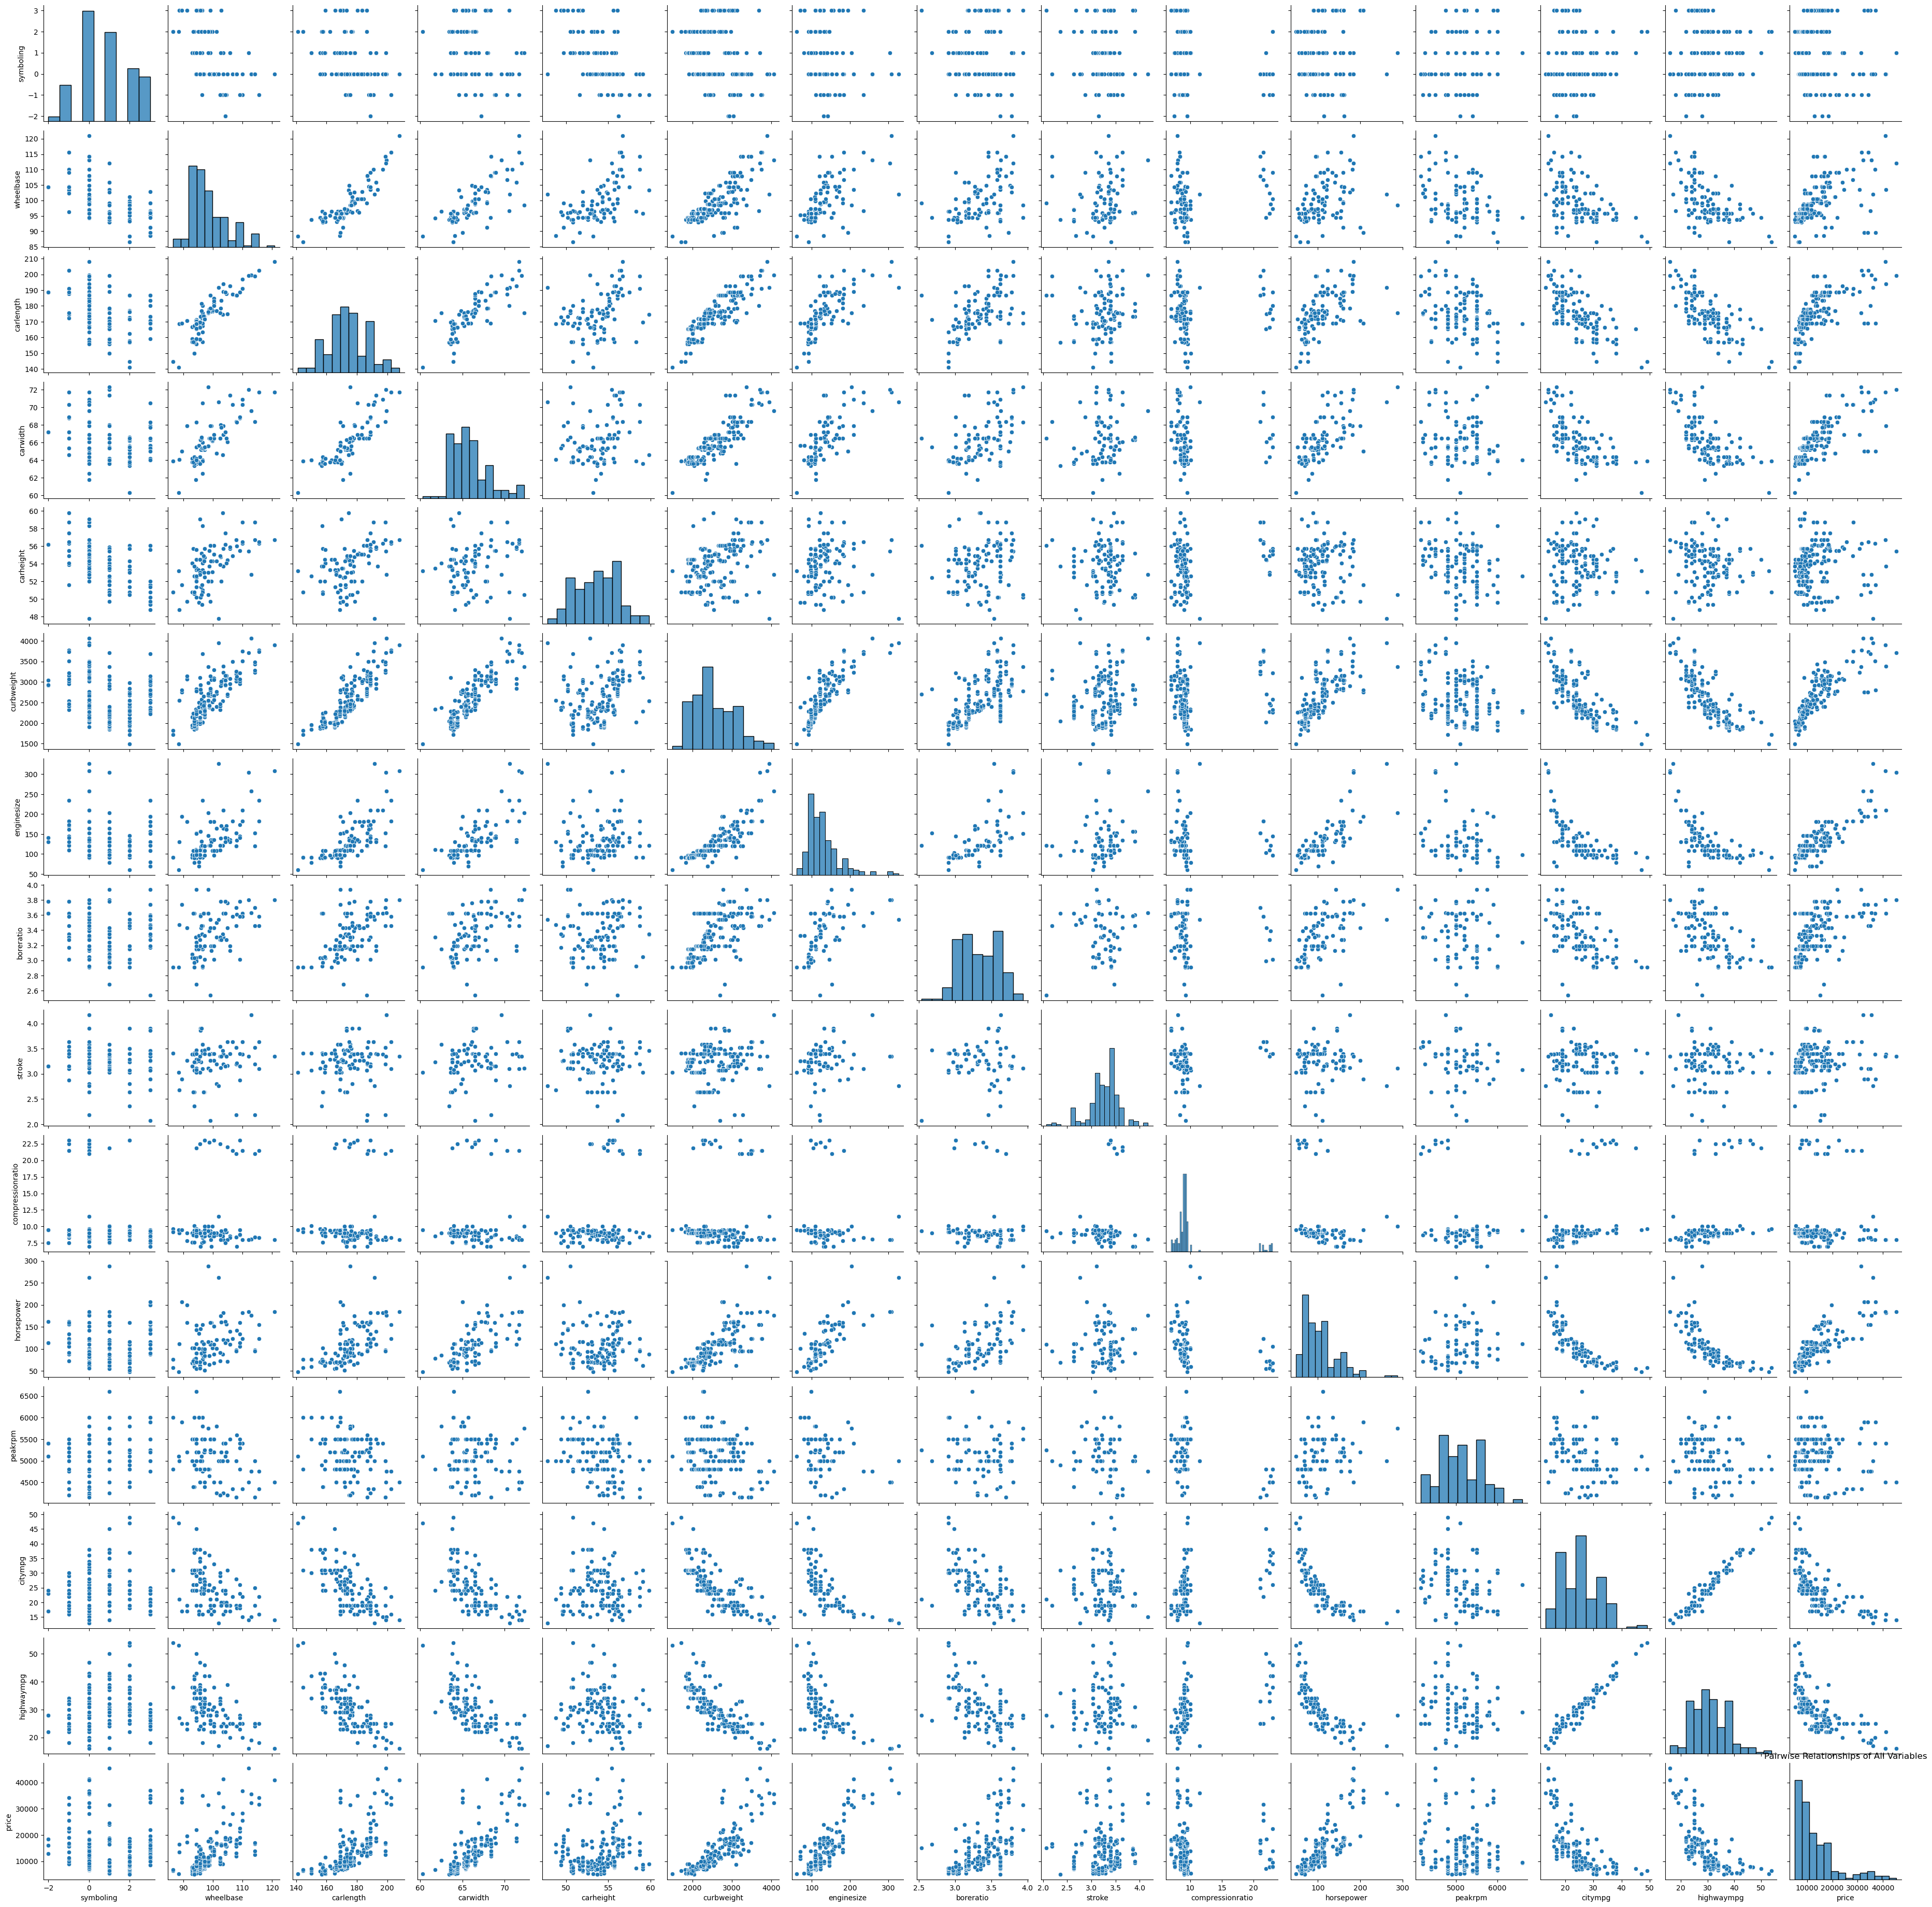

In [63]:
# Chart - 6 visualization code
df_subset = df[variables]

# Create the pair plot
sns.pairplot(df_subset)
plt.title('Pairwise Relationships of All Variables')
plt.show()
     

In [64]:
# value counts for fueltype
print(df.fueltype.value_counts())
# value counts for aspiration
print(df.aspiration.value_counts())
# value counts for doornumber
print(df.doornumber.value_counts())
# value counts for carbody
print(df.carbody.value_counts())
# value counts for drivewheel
print(df.drivewheel.value_counts())
# value counts for enginelocation
print(df.enginelocation.value_counts())
# value counts for enginetype
print(df.enginetype.value_counts())
# value counts for fuelsystem
print(df.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [23]:

# value counts for cylinernumber
print(df.cylindernumber.value_counts())

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [24]:

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the fueltype to integers
df['fueltype'] = label_encoder.fit_transform(df['fueltype'])
# Fit and transform the aspiration to integers
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
# Fit and transform the carbody to integers
df['carbody'] = label_encoder.fit_transform(df['carbody'])
# Fit and transform the drivewheel	 to integers
df['drivewheel'] = label_encoder.fit_transform(df['drivewheel'])
# Fit and transform the enginelocation to integers
df['enginelocation'] = label_encoder.fit_transform(df['enginelocation'])
# Fit and transform the doornumber to integers
df['doornumber'] = label_encoder.fit_transform(df['doornumber'])
# Fit and transform the enginetype to integers
df['enginetype'] = label_encoder.fit_transform(df['enginetype'])
# Fit and transform the cylindernumber to integers
df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])
# Fit and transform the fuelsystem to integers
df['fuelsystem'] = label_encoder.fit_transform(df['fuelsystem'])
     

In [25]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [27]:
# converting onject datatype to string datatype
df['CarName'] = df['CarName'].astype(str)

In [28]:
# separate the independent and dependent variable 
# Create X (independent variables) by selecting all columns except the target variable
X = df.drop(['car_ID','CarName', 'price'], axis=1)

# Create y (dependent variable) by selecting only the target variable column
y = df['price']


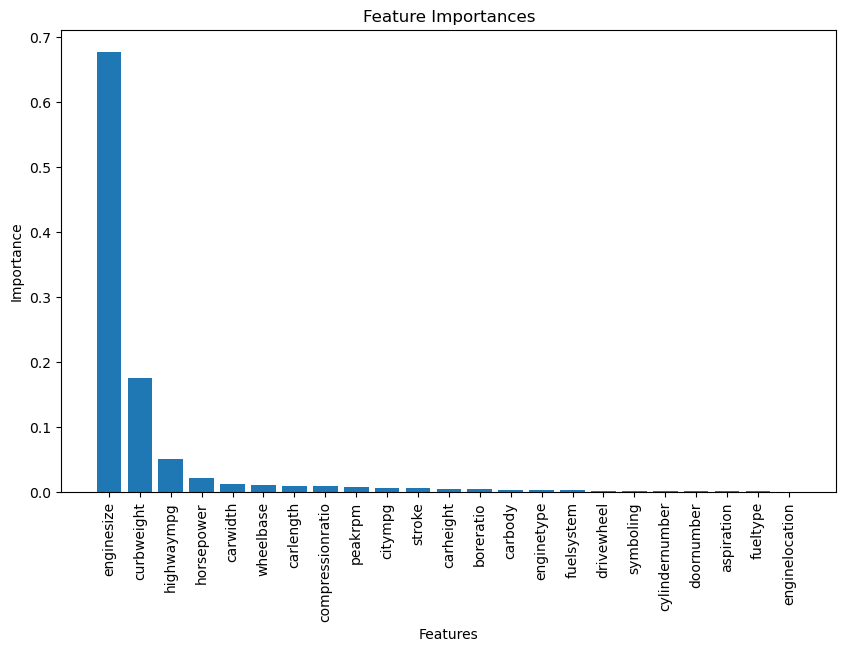

In [29]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming X is your feature matrix and y is the target variable

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the model to your data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), feature_names[indices], rotation='vertical')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:

# Lets rescale the all the values between  0 to 1 using the min_max_scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scale = MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test= scale.transform(X_test)

In [32]:

# lets check the shape of dataset
X_train.shape

(164, 23)

In [33]:

# check the shape of the testing dataset
X_test.shape

(41, 23)

In [34]:
# lets define function to calculate all the evaluation metrics
#Evaluate Metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [35]:
from sklearn.tree import DecisionTreeRegressor

# Assuming X and y are your independent and dependent variables respectively

# Create an instance of the DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(X_test)

In [36]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred)


Test set evaluation:
_____________________________________
MAE: 1962.2723658536586
MSE: 9046940.648826562
RMSE: 3007.8132669476945
R2 Square 0.8854005591808185
__________________________________


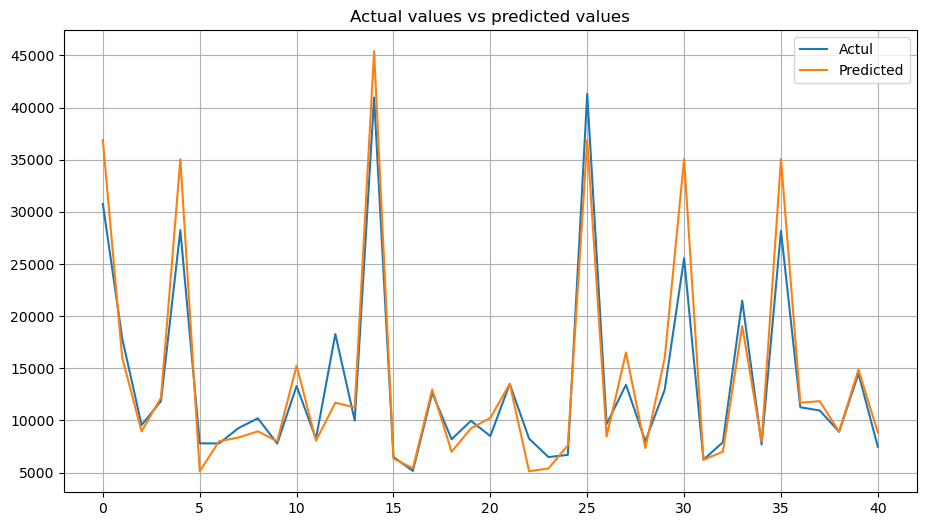

In [37]:
# plotting graph  for actual and predicted valeus
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(np.array(y_pred))
plt.title('Actual values vs predicted values')
plt.legend(['Actul','Predicted'])
plt.grid()
plt.show()

In [38]:
# import packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# model implementation
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [25]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)


In [39]:

# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)
train_pred = random_forest_model.predict(X_train)
test_pred_rf = random_forest_model.predict(X_test)
     

In [40]:

# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred_rf)

Test set evaluation:
_____________________________________
MAE: 1710.563745575378
MSE: 6484576.424904123
RMSE: 2546.4831483644502
R2 Square 0.9178585489737188
__________________________________


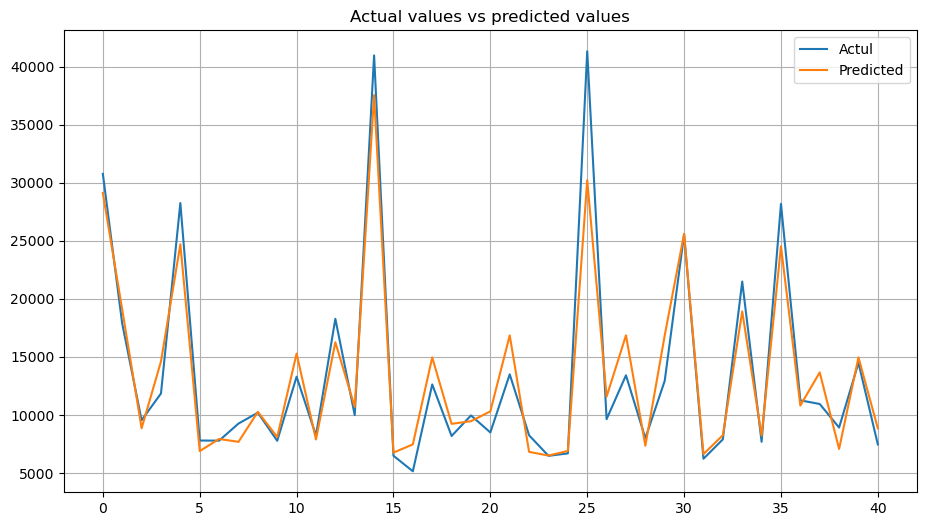

In [42]:

# plotting graph  for actual and predicted valeus
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(np.array(test_pred_rf))
plt.title('Actual values vs predicted values')
plt.legend(['Actul','Predicted'])
plt.grid()
plt.show()

In [43]:
# Model Training
from sklearn.ensemble import GradientBoostingRegressor

gbc_reg = GradientBoostingRegressor(random_state =42)
gbc_reg.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [44]:
# Model Prediction
y_pred_gb =gbc_reg.predict(X_test)
train_pred = gbc_reg.predict(X_train)
test_pred = gbc_reg.predict(X_test)
     

In [45]:
# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_gb)
     

Test set evaluation:
_____________________________________
MAE: 1667.525102198733
MSE: 5720109.695523835
RMSE: 2391.675081511666
R2 Square 0.9275422048207606
__________________________________


## Conclusion

In conclusion, the objective of predicting car prices has been addressed by developing a regression model that can accurately estimate the prices of cars based on their specifications. By following a systematic approach of data collection, preprocessing, feature selection, model training, and evaluation, we have created a reliable prediction model.

The selected regression algorithm (e.g., Decision Tree, Random Forest, or Gradient Boosting) has been trained on a labeled dataset containing car specifications and corresponding prices. The model has learned the patterns and relationships between the features and prices, enabling it to make accurate predictions on unseen car data.

Through the evaluation of the model's performance using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared (R^2) score, we have assessed the model's ability to predict car prices. The evaluation results have provided insights into the model's accuracy and effectiveness in capturing the variations in car prices.

We have seen that Gradient boost regressor is best fit model amongs implemented regression model giving us R2 square =0.9275